In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2.0,7.0,8.0,2.0,9.0,11.0,7.0,7.0,1.0,8.0,5.0,6.0,NaN
1,4.0,NaN,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,NaN
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,5.0,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,NaN
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3.0,4.0,10.0,7.0,NaN,12.0,10.0,9.0,2.0,9.0,NaN,6.0,NaN
19996,4.0,7.0,6.0,5.0,3.0,7.0,8.0,2.0,10.0,12.0,6.0,8.0,NaN,9.0,6.0,8.0,NaN
19997,4.0,8.0,4.0,6.0,NaN,7.0,8.0,7.0,4.0,10.0,7.0,6.0,3.0,9.0,3.0,7.0,NaN
19998,4.0,11.0,4.0,8.0,3.0,0.0,2.0,4.0,6.0,1.0,0.0,7.0,0.0,8.0,0.0,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	750
float64		column 2	1000
float64		column 3	1500
float64		column 4	500
float64		column 5	750
float64		column 6	750
float64		column 7	750
float64		column 8	1250
float64		column 9	1250
float64		column 10	750
float64		column 11	1250
float64		column 12	1500
float64		column 13	750
float64		column 14	1750
float64		column 15	1000
float64		column 16	500
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,19250.000000,19000.000000,18500.000000,19500.000000,19250.000000,19250.000000,19250.000000,18750.000000,18750.000000,19250.000000,18750.000000,18500.000000,19250.000000,18250.000000,19000.000000,19500.000000,0.0
mean,4.017922,7.054000,5.116054,5.379282,3.499325,6.904675,7.491429,4.625547,5.186080,8.274649,6.451360,7.928649,3.033143,8.335562,3.681526,7.803949,NaN
std,1.890020,3.261798,1.969081,2.239893,2.169699,2.000962,2.299140,2.649870,2.331091,2.469482,2.575058,2.029964,2.300922,1.493717,2.526661,1.601347,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,8.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,NaN


<AxesSubplot:>

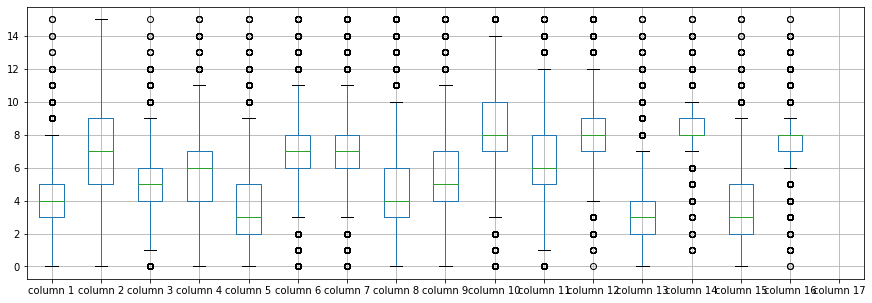

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.017922
column 2     7.054000
column 3     5.116054
column 4     5.379282
column 5     3.499325
column 6     6.904675
column 7     7.491429
column 8     4.625547
column 9     5.186080
column 10    8.274649
column 11    6.451360
column 12    7.928649
column 13    3.033143
column 14    8.335562
column 15    3.681526
column 16    7.803949
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.748525,0.845305,0.665213,0.614065,-0.034275,0.046535,0.015464,0.049890,0.144446,0.038486,-0.047101,0.482124,0.102375,0.267594,-0.101494,NaN
column 2,0.748525,1.000000,0.656714,0.817420,0.546299,0.043406,-0.038640,-0.029632,0.088471,0.153417,-0.052309,-0.004963,0.267056,0.003689,0.222780,-0.041924,NaN
column 3,0.845305,0.656714,1.000000,0.647770,0.758737,0.056563,0.026072,-0.095291,0.055419,0.111466,0.018112,-0.038559,0.546227,0.057436,0.251954,-0.113886,NaN
column 4,0.665213,0.817420,0.647770,1.000000,0.639473,0.043779,-0.018110,0.081107,0.056515,0.011240,-0.008661,0.029055,0.265278,0.026796,0.288094,-0.019491,NaN
column 5,0.614065,0.546299,0.758737,0.639473,1.000000,0.134830,-0.025501,-0.010808,-0.064311,-0.064846,-0.066656,-0.037067,0.620280,0.020817,0.482565,-0.068087,NaN
column 6,-0.034275,0.043406,0.056563,0.043779,0.134830,1.000000,-0.355973,-0.055296,-0.118244,0.087111,-0.337364,-0.031475,0.141126,-0.242298,0.123464,0.245130,NaN
column 7,0.046535,-0.038640,0.026072,-0.018110,-0.025501,-0.355973,1.000000,-0.113485,-0.049805,0.181286,0.589396,-0.260360,-0.037031,0.538675,-0.076908,-0.203038,NaN
column 8,0.015464,-0.029632,-0.095291,0.081107,-0.010808,-0.055296,-0.113485,1.000000,-0.180605,-0.313949,0.041502,0.080598,0.134986,-0.082318,0.008775,0.179765,NaN
column 9,0.049890,0.088471,0.055419,0.056515,-0.064311,-0.118244,-0.049805,-0.180605,1.000000,0.124455,-0.058249,0.114483,-0.374786,-0.051214,0.266325,-0.058108,NaN
column 10,0.144446,0.153417,0.111466,0.011240,-0.064846,0.087111,0.181286,-0.313949,0.124455,1.000000,0.054824,-0.105636,-0.171341,0.031379,-0.085518,-0.110408,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+4,17+4+4,17+4+4+4,17+4+4,17+4,17], vae_layer = False, seed = 40)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 75.55158236694336
Epoch: 1 , loss: 48.95810182495117
Epoch: 2 , loss: 44.325809301757815
Epoch: 3 , loss: 42.72142906951904
Epoch: 4 , loss: 41.6147198638916
Epoch: 5 , loss: 41.058908941650394
Epoch: 6 , loss: 40.652109103393556
Epoch: 7 , loss: 40.22557962341308
Epoch: 8 , loss: 39.95625393676758
Epoch: 9 , loss: 39.963995959472655
Epoch: 10 , loss: 39.617736296081546
Epoch: 11 , loss: 39.46900453186035
Epoch: 12 , loss: 39.474989724731444
Epoch: 13 , loss: 39.352927813720704
Epoch: 14 , loss: 39.41834466247558
Epoch: 15 , loss: 39.15448365478515
Epoch: 16 , loss: 39.1467856048584
Epoch: 17 , loss: 39.058477688598636
Epoch: 18 , loss: 39.03165141143799
Epoch: 19 , loss: 38.7685647857666
Epoch: 20 , loss: 38.843207916259765
Epoch: 21 , loss: 38.8456883972168
Epoch: 22 , loss: 38.81265559539795
Epoch: 23 , loss: 38.75796214752197
Epoch: 24 , loss: 38.60912652282715
Epoch: 25 , loss: 38.58063978271485
E

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     6.444413
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17   -0.003132
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN
1,0.0,-0.064798,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,-3.626804,0.0,0.0,0.0,0.000000,0.0,0.973505,0.0,NaN
19996,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.018235,0.0,0.000000,0.0,NaN
19997,0.0,0.000000,0.0,0.0,-1.157734,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN
19998,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

396.5410556642673

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.10620261198938322

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      3.000000
column 9      4.121486
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17    -0.006483
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.000000,4.0,3.0,2.000000,7.0,8.0,2.0,9.000000,11.0,7.0,7.0,1.000000,8.0,5.000000,6.0,-0.006672
1,4.0,6.935202,5.0,5.0,5.000000,5.0,9.0,6.0,4.000000,8.0,7.0,9.0,2.000000,9.0,7.000000,10.0,-0.005068
2,7.0,10.000000,8.0,7.0,4.000000,8.0,8.0,5.0,10.000000,11.0,2.0,8.0,2.000000,5.0,5.000000,10.0,-0.003045
3,4.0,9.000000,5.0,7.0,4.000000,7.0,7.0,13.0,1.000000,7.0,6.0,8.0,3.000000,8.0,0.000000,8.0,-0.002011
4,6.0,7.000000,8.0,5.0,4.000000,7.0,6.0,3.0,7.000000,10.0,7.0,9.0,3.000000,8.0,3.000000,7.0,-0.000393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.000000,5.0,8.0,3.000000,4.0,10.0,7.0,4.373196,12.0,10.0,9.0,2.000000,9.0,2.973505,6.0,0.002165
19996,4.0,7.000000,6.0,5.0,3.000000,7.0,8.0,2.0,10.000000,12.0,6.0,8.0,2.018235,9.0,6.000000,8.0,-0.002342
19997,4.0,8.000000,4.0,6.0,2.842266,7.0,8.0,7.0,4.000000,10.0,7.0,6.0,3.000000,9.0,3.000000,7.0,-0.000299
19998,4.0,11.000000,4.0,8.0,3.000000,0.0,2.0,4.0,6.000000,1.0,0.0,7.0,0.000000,8.0,0.000000,8.0,-0.001744


In [21]:
imputations[-1].to_excel("Letter_NL_5(imp).xlsx", index=False, header=False)